In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
# frozen_model = 'frozen_inference_graph.pb'

frozen_model = "C://Users//Siddhant Patnaik//OneDrive//Desktop//Projects//frozen_inference_graph.pb"
config_file  ="C://Users//Siddhant Patnaik//OneDrive//Desktop//Projects//ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
print(frozen_model)
print(config_file)


C://Users//Siddhant Patnaik//OneDrive//Desktop//Projects//frozen_inference_graph.pb
C://Users//Siddhant Patnaik//OneDrive//Desktop//Projects//ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt


In [5]:
classLabels = []
file_name = 'C://Users//Siddhant Patnaik//OneDrive//Desktop//Projects//labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 000001E7CA744F30>

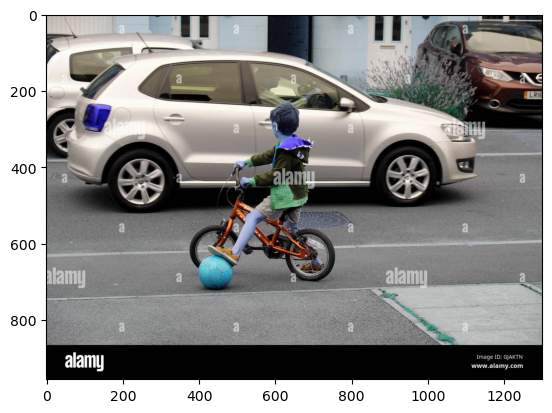

In [8]:
img = cv2.imread('C://Users//Siddhant Patnaik//OneDrive//Desktop//Projects//boy.jpg')
plt.imshow(img)

In [9]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold = 0.5)

In [10]:
print(ClassIndex)

[ 1  3  3  3 37  2  3  3  3  3  3]


In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0) ,2)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255,0), thickness= 3)
        

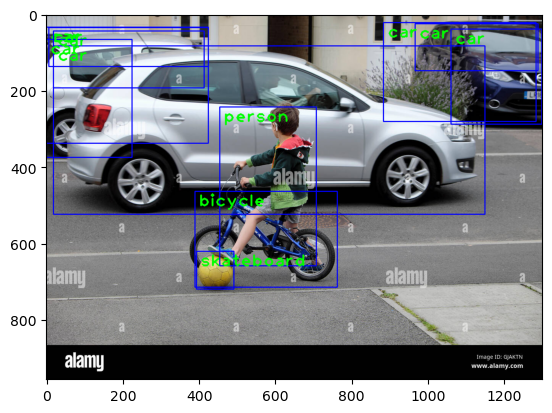

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2

# Video capture
cap = cv2.VideoCapture('C://Users//Siddhant Patnaik//OneDrive//Desktop//Projects//12254637-uhd_3840_2160_60fps.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Can't open the video")

# Get the original video frame width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Create named windows and set the original size for each window
cv2.namedWindow('Obj Detection', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Obj Detection', frame_width, frame_height)

cv2.namedWindow('Original Frame', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Original Frame', frame_width, frame_height)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect objects in the frame
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)

    if len(ClassIndex) != 0:
        img_copy = frame.copy()
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(img_copy, boxes, (255, 0, 0), 2)
                cv2.putText(img_copy, classLabels[ClassInd - 1],
                            (boxes[0] + 10, boxes[1] + 40),
                            font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

        # Display the modified frame
        cv2.imshow('Obj Detection', img_copy)

    # Display the original frame
    cv2.imshow('Original Frame', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[3 1 3 3 1 1 1 1 1 1 3 1 1 6 3 3]
[3 1 3 3 1 1 1 1 1 1 1 1 1 3 3 1 1 3]
[3 1 3 1 3 1 1 1 1 3 1 3 1 1 1 3]
[3 3 1 1 3 1 3 1 1 1 1 1 1 3 1 1]
[1 3 3 1 1 3 1 1 1 3 1 1 1 1 1 3]
[1 3 1 1 3 3 1 1 1 3 1 1 1]
[3 1 1 3 1 1 1 1 3 3 1 1 1]
[3 1 1 3 1 1 1 1 3 1 1 3 6]
[3 1 3 1 1 1 1 1 1 3 3 1]
[3 1 1 1 3 1 1 1 1 3 3 1 3 1 3]
[3 1 1 3 1 1 1 3 1 1 3 3]
[3 1 1 1 1 3 1 1 3 6 1 3 3]
[3 1 1 1 3 1 3 1 1 1 3 3 1]
[3 1 1 1 1 3 1 1 6 3 1 3 1 3]
[3 1 1 1 1 3 6 1 1 3 3 1 1]
[3 1 1 1 1 6 3 1 1 1 1 3]
[3 1 1 1 1 3 6 1 1 3 1 1]
[3 6 1 1 1 1 1 3 1 3 1 1]
[3 1 6 1 1 1 1 3 1 3 1 1 3]
[3 1 6 1 1 1 3 1 1 1 3 1 1]
[3 1 6 1 1 1 1 1 1 1 3 3 1 1]
[3 1 1 6 1 1 3 1 1 1]
[3 1 1 6 1 1 1 1 3]
[3 1 1 6 1 1 1 3 1]
[3 1 1 6 1 1 1 3 1 1]
[3 1 1 6 1 1 1 3 1]
[3 1 1 6 1 1 3 1]
[3 1 1 1 6 1 3 1 1 1]
[3 1 1 1 1 6 3 1 1]
[3 1 1 6 1 1 3 6]
[3 1 1 1 1 6 6 3]
[3 1 1 1 1 6 6 3 1 1]
[3 1 1 1 1 6 3 6 1 6]
[3 1 1 1 1 6 6 1 3]
[3 1 1 1 1 6 6 3]
[3 1 1 1 1 6 1 6]
[3 1 1 1 1 6 6 8]
[3 1 1 1 1 6 6 3 8]
[3 1 1 1 1 6 6 3 1 1]
[3 1 1 1 1 6 1 6 1 8

In [ ]:
#VIDEO 
cap = cv2.VideoCapture('C://Users//Siddhant Patnaik//OneDrive//Desktop//Projects//12254637-uhd_3840_2160_60fps.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Can't open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    print (ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd , conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                    cv2.rectangle(img, boxes, (255, 0, 0) ,2)
                    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255,0), thickness= 3)

        cv2.imshow('Obj Detection', frame)
        if cv2.waitKey(2) & 0xff == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
                
    